<a href="https://colab.research.google.com/github/snsk/ai_testing_metamorphic/blob/main/neuron_coverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ニューロンカバレッジ

* ニューロンカバレッジでは多層モデルのうち、中間層に着目する
  * 入力層と出力層は見ない



# 画像変形した1枚を判定する際のニューロンカバレッジを取る


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 98, 98, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 49, 49, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 23, 23, 64)       

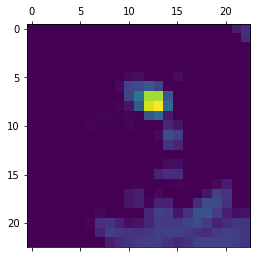

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img
import pprint
from keras import backend as K

colab_root = '/content/drive/MyDrive/colab_root/'

# 画像を読み込む。
img = image.load_img(colab_root+'hiyashi_3.jpg',  target_size=(100,100))
img = np.array(img)

#plt.imshow(img)
#plt.show()

# flow に渡すために配列を四次元化
img = img[None, ...]

# 画像変形のジェネレータを作成
datagen = image.ImageDataGenerator(rotation_range=0)
gen = datagen.flow(img, batch_size = 1)

# バッチの実行
batches = next(gen)
g_img = batches[0]/255
g_img = g_img[None, ...]

# modelの読み込み
model = load_model(colab_root + 'ramen_hiyashi_acc0.9675.h5')
model.summary()
# 正解ラベルの定義
label=['ramen', 'hiyashi']

# 判別
pred = model.predict(g_img, batch_size=1, verbose=0)
score = np.max(pred)
pred_label = label[np.argmax(pred[0])]
print('name:',pred_label)
print('score:',score)

# output
# with a Sequential model
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[7].output])
layer_output = get_3rd_layer_output(g_img)[0]
#print(layer_output)
plt.matshow(layer_output[0, :, :, 4], cmap='viridis')
plt.show()


#2種類の画像を識別するモデル

Epoch 1/40
51/51 [==============================] - 78s 2s/step - loss: 0.6873 - accuracy: 0.5484 - val_loss: 0.7167 - val_accuracy: 0.5137
Epoch 2/40
51/51 [==============================] - 78s 2s/step - loss: 0.6686 - accuracy: 0.5840 - val_loss: 0.6736 - val_accuracy: 0.5187
Epoch 3/40
51/51 [==============================] - 78s 2s/step - loss: 0.6552 - accuracy: 0.6371 - val_loss: 0.6865 - val_accuracy: 0.5237
Epoch 4/40
51/51 [==============================] - 78s 2s/step - loss: 0.6356 - accuracy: 0.6433 - val_loss: 0.6323 - val_accuracy: 0.6409
Epoch 5/40
51/51 [==============================] - 78s 2s/step - loss: 0.6223 - accuracy: 0.6502 - val_loss: 0.6524 - val_accuracy: 0.5885
Epoch 6/40
51/51 [==============================] - 78s 2s/step - loss: 0.6203 - accuracy: 0.6433 - val_loss: 0.7125 - val_accuracy: 0.5137
Epoch 7/40
51/51 [==============================] - 78s 2s/step - loss: 0.6343 - accuracy: 0.6384 - val_loss: 0.6470 - val_accuracy: 0.6110
Epoch 8/40
51/51 [==

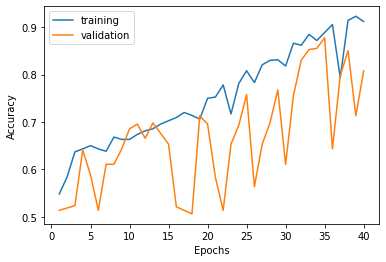

13/13 [==============================] - 4s 330ms/step - loss: 0.5248 - accuracy: 0.8080
[0.5248034596443176, 0.8079800605773926]
Test:
13/13 [==============================] - 4s 328ms/step - loss: 0.5248 - accuracy: 0.8080

Test accuracy: 0.8079800605773926


In [ ]:
import keras
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import keras.optimizers
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import glob

folder = ["ramen","hiyashi"]
image_size = 100
X = []
Y = []
for index, name in enumerate(folder):
    dir = "/content/drive/MyDrive/colab_root/" + name
    files = glob.glob(dir + "/*.jpg")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        X.append(data)
        Y.append(index)

X = np.array(X)
Y = np.array(Y)

X = X.astype('float32')
X = X / 255.0

# 正解ラベルの形式を変換
Y = np_utils.to_categorical(Y, 2)

# 学習用データとテストデータ
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
'''
X_train:訓練用入力データ
X_test :訓練用正解データ
Y_train:評価用入力データ
Y_test :評価用正解データ
'''

# CNNを構築
# Sequentialモデルは addされたモデル層が一列に並ぶ
model = Sequential()

#Conv2D:2次元畳み込み層 3x3のパネルを32枚使う。padding='same' で出力画像のサイズが変わらないようにする
model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:], activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

#モデルのコンパイル
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

#モデルの訓練
epochs_num=40
result = model.fit(X_train, Y_train, epochs=epochs_num, validation_data=(X_test, Y_test))

#modelのビジュアル可視化。要install and PATH setting GraphViz, pydot
#functional API を利用した複雑なモデルの時はこちら
plot_model(model, to_file='./model.png', show_shapes=True, expand_nested=True)
#modelのテキスト可視化。Sequentialモデルならこれでも十分、らしい
#print(model.summary())

#model.save('ramen_hiyashi.h5')

import matplotlib.pyplot as plt
 
plt.plot(range(1, epochs_num+1), result.history['accuracy'], label="training")
plt.plot(range(1, epochs_num+1), result.history['val_accuracy'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#評価 & 評価結果出力
print(model.evaluate(X_test, Y_test))
print('Test:')
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)
print('\nTest accuracy:', test_acc)

# 構築済みのモデルを使う



In [2]:
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import img_to_array, load_img

colab_root = '/content/drive/MyDrive/colab_root/'

# modelと画像ファイルの読み込み
model = load_model(colab_root + 'ramen_hiyashi_acc0.9675.h5')

# 画像ファイルの行列変換
img = img_to_array(load_img(colab_root + 'ramen_2.jpg', target_size=(100,100)))
img_nad = img_to_array(img)/255
img_nad = img_nad[None, ...]

# 正解ラベルの定義
label=['ramen', 'hiyashi']

# 判別
pred = model.predict(img_nad, batch_size=1, verbose=0)
print(pred)
score = np.max(pred)
pred_label = label[np.argmax(pred[0])]
print('name:',pred_label)
print('score:',score)

[[0.7606613  0.23933864]]
name: ramen
score: 0.7606613


# colab sandbox

In [ ]:
!python -V

Python 3.7.11
